# Numpy Basics

In this notebook we introduce the [numpy](http://www.numpy.org/) module. It is perhaps the most widely used library for scientific computing in Python. Many other libraries, like the pandas library used in data analysis, are built on top of it. 

Perhaps the main feature of the numpy library is the multidimensional array data structure. Contrary to lists and  other iterable types we have seen, numpy arrays were specially designed with linear algebra in mind. This means that all the usual operations from linear algebra are already implemented in numpy with performance and practicality in mind. Let us consider our first example to illustrate this.

```python
import numpy as np
myFirstList = [1,2,3,4]
mySecondList = [7,8,9,10]
plusList = myFirstList + mySecondList
myFirstNumpyArray = np.array(myFirstList)
mySecondNumpyArray = np.array(mySecondList)
plusNumpyArray = myFirstNumpyArray + mySecondNumpyArray

print("Using + with lists: {} + {} = {}".format(myFirstList, mySecondList, plusList))
print("Using + with numpy arrays: {} + {} = {}".format(myFirstNumpyArray, mySecondNumpyArray, plusNumpyArray))
```

The code above compares the use of the "+" operator in lists and numpy arrays. Run it in the cell below. 

In [2]:
import numpy as np
myFirstList = [1,2,3,4]
mySecondList = [7,8,9,10]
plusList = myFirstList + mySecondList
myFirstNumpyArray = np.array(myFirstList)
mySecondNumpyArray = np.array(mySecondList)
plusNumpyArray = myFirstNumpyArray + mySecondNumpyArray

print("Using + with lists: {} + {} = {}".format(myFirstList, mySecondList, plusList))
print("Using + with numpy arrays: {} + {} = {}".format(myFirstNumpyArray, mySecondNumpyArray, plusNumpyArray))

Using + with lists: [1, 2, 3, 4] + [7, 8, 9, 10] = [1, 2, 3, 4, 7, 8, 9, 10]
Using + with numpy arrays: [1 2 3 4] + [ 7  8  9 10] = [ 8 10 12 14]


As you saw, lists have a computer science bias. They store data, and the "+" operator simply means storing more stuff. The numpy array on the other hand impersonates the physicist's favorite tool: the vector. For numpy arrays, "+" is simply vector addition. And indeed, this reasoning goes much further. We can do to numpy arrays pretty much everything we would do to vectors and get the results we intuitively expect. The next exercises illustrate this point.

### Exercise 1. Scalar multiplication of arrays.
Write a function that multiplies all elements of a list (aList) by a number (aNumber). Your function should return the result. Implement your function without using loops.

### Exercise 2. Multiplying arrays.
Just like we did with the "+" operator, write a function that takes two lists of same length as inputs and returns a list obtained by element-wise multiplication. Again, use numpy arrays to bypass for loops.

We can further demonstrate how numpy makes life easier for scientists. Suppose we want to transpose a matrix, say 

\begin{equation}
A = \begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{bmatrix}
\end{equation}

Without numpy, we could do something like this.
```python
def transpose(aMatrix):
    return [ [ line[j] for line in aMatrix] for j in range(len(aMatrix))]
a = [[1,2,3], [4,5,6], [7,8,9]]
transpose(a)
```


In [3]:
def transpose(aMatrix):
    return [ [ line[j] for line in aMatrix] for j in range(len(aMatrix))]
a = [[1,2,3], [4,5,6], [7,8,9]]
transpose(a)

[[1, 4, 7], [2, 5, 8], [3, 6, 9]]

There are many other ways to do this with lists in Python, of course. But we could otherwise just write
```python
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
a.transpose()
```

In [4]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
a.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

### Exercise 3. The dot product.
The dot (or inner) product of two vectors is found virtually everywhere in science. The usual definition in $\mathbb{R}^n$ in terms of vector components $u = (u_0,... ,u_{n-1})$ is $u\cdot v = \sum_{i=0}^{n-1} u_iv_i$. This type of operation in which indices are contracted are far more general, though. As another example, the matrix product of two matrices $A = [a_{ij}]$ and $B = [b_{ij}]$ is given by $[A\cdot B]_{ij} = \sum_{k=0}^{n-1}a_{ik}b_{kj}$. Evidently, we assume that the number of columns in $A$ is identical to the number of lines in $B$. In what follows, implement code that computes the dot and matrix products with lists. We have also put some benchmark code to test the performance of our homemade `dot_product()` against `np.dot()`. Do the same with `matrix_product()` against `np.dot()`. Could you have predicted the shapes of the resulting curves? 

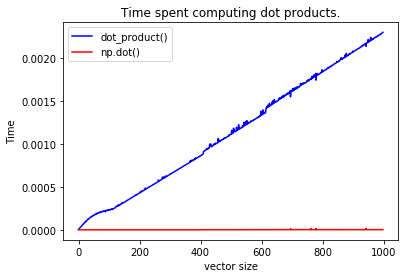

In [5]:
import numpy as np
import time
import matplotlib.pyplot as plt
def dot_product(vector1, vector2):
    """
    Returns the dot product of two vectors. The vectors are assumed to have
    same length.
    
    vector1: an iterable.
    vector2: another iterable.
    
    """
    dotProduct = 0
    for i in range(len(vector1)):
        dotProduct += vector1[i]*vector2[i]
    return dotProduct

def matrix_product(matrix1, matrix2):
    """
    Returns the matrix product of two matrices. The number of columns in 
    matrix1 is equal to the number of lines in matrix2.
    
    matrix1: An iterable (for example a list of embedded lists).
    matrix2: Another iterable like matrix1.
    
    """
    productMatrix = []
    for line in matrix1:
        productMatrixLine = []
        for column in transpose(matrix2):
            productMatrixLine.append(dot_product(line,column))
        productMatrix.append(productMatrixLine)
    return productMatrix
    
# We now time the performance of dot_product() against np.dot().
# We sample two arrays from the random uniform distribution in [0,1),
# with sizes ranging from 4 to 10000 in steps of 4.

def benchmark(aFunction, firstArg, secondArg, numberOfTests = 1):
    """
    Returns the best (that is, the least) processing time spent by a function  
    that takes two arguments.
    
    aFunction: The function whose performance we are measuring.
    firstArg: The first argument of aFunction
    secondArg: The second argument of aFunction
    numberOfTests: The number of times we compute 
                   aFunction(firstArg, secondArg)
    """
    threeTimes = []
    for i in range(numberOfTests):
        start = time.time()
        aFunction(firstArg, secondArg)
        end = time.time()
        threeTimes.append(end-start)
    return min(threeTimes)


dotProductTimes = []
npDotTimes = []
for size in range(10, 10000, 10):
    array1 = np.random.uniform(size = size)
    array2 = np.random.uniform(size = size)
    list1 = list(array1)
    list2 = list(array2)
    timeDotProduct =  benchmark(dot_product, list1, list2,numberOfTests=10)
    timeNpDot = benchmark(np.dot, array1, array2, numberOfTests=10)
    dotProductTimes.append(timeDotProduct)
    npDotTimes.append(timeNpDot)
plt.plot(dotProductTimes, color = "blue", label = "dot_product()")
plt.plot(npDotTimes, color = "red", label = "np.dot()")
plt.title("Time spent computing dot products.")
plt.xlabel("vector size")
plt.ylabel("Time")
plt.legend()
plt.show()

We now briefly discuss four nice features of numpy: vectorization, broadcasting, array indexing and boolean masks. 

## Vectorization
The numpy library was designed with support for [array programming](https://en.wikipedia.org/wiki/Array_programming) in mind. This means that numpy functions that apply to scalars can usually be used with arrays without the need of loops. Such functions are often said to be vectorized and usually result in performance gains when compared to loops. A typical example is the task of adding all the elements of an array. With a `for` loop, we would write something like


```python
myArray = np.random.uniform(0,1,100)
total = 0
for element in myArray:
    total += element
``` 
This can be compared with the simplicity of the `np.sum()` function:
```python
total = np.sum(myArray)
```



In [37]:
myArray = np.random.uniform(0,1,100)
total = 0
for element in myArray:
    total += element
total

52.690315982912196

In [38]:
total = np.sum(myArray)
total

52.690315982912175

As we have discussed in the beginning of this notebook, all familiar operations like `+`, `*`, `/`, `//`, `**` are vectorized in numpy. But that is not all. Most (if not all) [mathematical functions](https://docs.scipy.org/doc/numpy/reference/routines.math.html) in numpy are. The general process of vectorization works as 
\begin{equation}
f\big ((v_1,...,v_n)\big ) = \big (f(v_1),..., f(v_n) \big).
\end{equation}
Therefore, we compute the cosines of all elements in an array with
```python
angles = np.linspace(0,2*np.pi, 7)
cosines = np.cos(angles)
print("angles: ", angles)
print("cosines: ", cosines)
```


In [62]:
angles = np.linspace(0,2*np.pi, 7)
cosines = np.cos(angles)
print("angles: \n", angles)
print("cosines: \n", cosines)

angles: 
 [ 0.          1.04719755  2.0943951   3.14159265  4.1887902   5.23598776
  6.28318531]
cosines: 
 [ 1.   0.5 -0.5 -1.  -0.5  0.5  1. ]


Often the functions we want to apply to arrays are functions we ourselves create. These are not vectorized by nature. The good news is that numpy has a commodity function `np.vectorize()` that vectorizes other functions. It works like this.
```python
myVectorizedFunction = np.vectorize(myFunction)
```
Together with python's [lambda]() expressions for defining anonymous functions, it can save us lines of code.  
As an example, the two pieces of code below are equivalent.
```python
def myFunction(x):
    return x+3
myVectorizedFunction = np.vectorize(myFunction)
myArray = np.linspace(0,10,11)
result = myVectorizedFunction(myArray)
print("Result with standard function definition: ", result)
```
is equivalent to

```python
myArray = np.linspace(0,10,11)
myVectorizedFunction = np.vectorize(lambda x: x + 3)
result = myVectorizedFunction(myArray)
print("Result with lambda expression: ", result)
```


In [60]:
def myFunction(x):
    return x+3
myVectorizedFunction = np.vectorize(myFunction)
myArray = np.linspace(0,10,11)
result = myVectorizedFunction(myArray)
print("Result with standard function definition: \n", result)

Result with standard function definition: 
 [  3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.]


In [61]:
myArray = np.linspace(0,10,11)
myVectorizedFunction = np.vectorize(lambda x: x + 3)
result = myVectorizedFunction(myArray)
print("Result with lambda expression: \n", result)

Result with lambda expression: 
 [  3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.]


### Exercise 4. The Lie exponential.

In this exercise we use numpy arrays' vectorization capabilities to compute [exponentials of matrices][1]. Given a matrix $X$, its exponential is given  
[1]: https://en.wikipedia.org/wiki/Exponential_map_(Lie_theory) 


## Broadcasting
A particularly useful feature of numpy arrays is [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). This is the capacity of numpy to operate with arrays of different dimensions. As a first example, how would we add the same number to all entries of an array?

```python
myArray = np.array([1,2,3])
myInt = 10
myNewArray = myArray + myInt
print(myNewArray)
```

In [42]:
myArray = np.array([1,2,3])
myInt = 10
myNewArray = myArray + myInt
print("myArray: ", myArray)
print("myInt: ", myInt)
print("myNewArray = myArray + myInt: ", myNewArray)

myArray:  [1 2 3]
myInt:  10
myNewArray = myArray + myInt:  [11 12 13]


Numpy therefore understands our intention here: by adding a number to an array, we mean adding this number to all entries in the array. We thus optimize our code by avoiding iterating over it.  Let us consider a second example.

```python
array1 = np.array([[1,2,3],[4,5,6]])
array2 = np.array([10,20,30])
mySum = array1 + array2
print("array1: ", array1)
print("array2: ", array2)
print("mySum = array1 + array2 ", mySum)

```


In [59]:
array1 = np.array([[1,2,3], [4,5,6]])
array2 = np.array([10,20,30])
mySum = array1 + array2
print("array1: \n", array1)
print("array2: \n", array2)
print("mySum = array1 + array2: \n", mySum)

array1: 
 [[1 2 3]
 [4 5 6]]
array2: 
 [10 20 30]
mySum = array1 + array2: 
 [[11 22 33]
 [14 25 36]]


Again, we are operating on arrays of different shapes (`array1` is (2,1), while `array2` is (1,)). This is no problem to numpy, since it understands that the first dimension in `array1` is equal to the first (and single) dimension in `array2`: both are 3. Now let us see an example of two arrays that cannot be broadcast together. If you run the code below, you should read an error message.
```python
array1 = np.array([[1,2,3],[4,5,6]])
array3 = np.array([10,20])
mySum = array1 + array3
```


In [44]:
array1 = np.array([[1,2,3],[4,5,6]])
array3 = np.array([10,20])
mySum = array1 + array3


ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

We see that numpy considers `array3` as a line vector with two components. Since `array1` can be seen as a 2X3 matrix, each line in `array1` has three components. So we see what the problem is: we cannot add vectors with two components to vectors with three components. Pretty intuitive. But what if I wanted to add `array3` to `array1` column-wise? Could we just transpose `array3` and achieve that? Let us test it.

```python
mySum = array1 + np.transpose(array3)

```



In [45]:
mySum = array1 + np.transpose(array3)

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

No deal again! In order two operate on two arrays, it is required that they have compatible dimensions. From the [documentation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html#general-broadcasting-rules), two dimensions are compatible when

   1. they are equal, or
   2. one of them is 1.

We can understand what this means by checking the `shape` attribute of arrays `array1`, `array2` and `array3`. Let's do this.

```python
print("array1: ", array1, "Shape of array1: ", array1.shape)
print("array2: ", array2, "Shape of array2: ", array2.shape)
print("array3: ", array3, "Shape of array3: ", array3.shape)
```
 

In [58]:
print("array1: \n", array1) 
print("array2: \n", array2) 
print("array3: \n", array3) 
print("\n")
print("Shape of array1: ", array1.shape)
print("Shape of array2: ", array2.shape)
print("Shape of array3: ", array3.shape)

array1: 
 [[1 2 3]
 [4 5 6]]
array2: 
 [10 20 30]
array3: 
 [10 20]


Shape of array1:  (2, 3)
Shape of array2:  (3,)
Shape of array3:  (2,)


By the second rule, if the shape of array3 were (2,1), we should be able to add array3 to array1. Let's try to do this.

```python
array3.shape = (2,1)
print("array3: ", array3)
mySum = array1 + array3
print("mySum: ", mySum)
```

### Exercise 4. Create the following arrays in numpy and guess their shape. 
You can always check your answer using the shape attribute. 
\begin{equation}
A = \begin{bmatrix}
\begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix} & \begin{bmatrix}
5 & 6\\
7 & 8
\end{bmatrix}
\end{bmatrix}
\end{equation}

\begin{equation}
B = \begin{bmatrix}
\begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix} & \begin{bmatrix}
5 & 6\\
7 & 8
\end{bmatrix}\\
\begin{bmatrix}
11 & 12\\
13 & 14
\end{bmatrix} & \begin{bmatrix}
15 & 16\\
17 & 18
\end{bmatrix}
\end{bmatrix}
\end{equation}

\begin{equation}
C = \begin{bmatrix}
\begin{bmatrix}
1 \\
3 
\end{bmatrix} & \begin{bmatrix}
2 \\
4 
\end{bmatrix} & \begin{bmatrix}
5 \\
7 
\end{bmatrix} & \begin{bmatrix}
6 \\
8 
\end{bmatrix}
\end{bmatrix}
\end{equation}

\begin{equation}
D = \begin{bmatrix}
\begin{bmatrix}
1 \\
3 
\end{bmatrix} & \begin{bmatrix}
2 \\
4 
\end{bmatrix} & \begin{bmatrix}
5 \\
7 
\end{bmatrix} &  \begin{bmatrix}
6 \\
8 
\end{bmatrix} \\
\begin{bmatrix}
11\\
13
\end{bmatrix} & \begin{bmatrix}
12\\
14
\end{bmatrix} & \begin{bmatrix}
15\\
17
\end{bmatrix} & \begin{bmatrix}
16\\
18
\end{bmatrix}
\end{bmatrix}
\end{equation}

In [47]:
A = np.array([ [ [1,2], [3,4] ], [ [5,6], [7,8] ] ])
A.shape

(2, 2, 2)

### Exercise 5.  Broadcasting the arrays from exercise 4.
If you created the arrays from exercise 4 correctly, it should be possible to broadcast $A$ to the shape of $B$ and $C$ to the shape of $D$. So numpy should be able to compute $B - A$ and $D - C$ for example. Perform these operations. Does the result agree with our intuition?

## Array indexing

We often want to acces elements inside an array, be it for referencing or assignment. Numpy gives us several ways to achieve this. Before we actually get to array indexing, let us quickly review [indexing](https://docs.scipy.org/doc/numpy/user/basics.indexing.html#indexing) in numpy.   The canonical way to access an element of an array by index is just to pass the element's indices separated by commas between square brackets. So for example, if we want to access the number 3 in the matrix $A$ below to change it to 9,
\begin{equation}
A = \begin{bmatrix}
1 & 2\\
3 & 4\\
\end{bmatrix}
\end{equation}
we just type

```python
A = np.array([[1,2], [3,4]])
print("A before change: ", A)
A[1,0] = 9
print("A after change: ", A)
```


In [57]:
A = np.array([[1,2], [3,4]])
print("A before change: \n", A)
A[1,0] = 9
print("A after change: \n", A)

A before change: 
 [[1 2]
 [3 4]]
A after change: 
 [[1 2]
 [9 4]]


### Exercise 6. Find the number 5.
Find the number 5 in each of the arrays in exercise 4. Change it to 42.

Numpy also supports slicing, a feature we already saw when studying lists. This allows us to capture many elements of an array without having to write their indices explicitly. Consider the array below.

\begin{equation}
A = \begin{bmatrix}
1 & 2& 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}
\end{equation}

Suppose we wanted to capture just a block of A, namely
\begin{equation}
B = \begin{bmatrix}
1 & 2\\
4 & 5\\
\end{bmatrix}
\end{equation}
We can easily do this with slicing.

```python
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = A[0:2,0:2]
print('A: ', A)
print('B: ', B)
```

In [56]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
B = A[0:2,0:2]
print('A: \n', A)
print('B: \n', B)

A: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
B: 
 [[1 2]
 [4 5]]


Note that, just as with lists, the lower limit of a slice is inclusive, while the upper limit is exclusive. There is 

## Boolean masks

Numpy has a very powerful indexing tool based on boolean arrays called [boolean mask](https://docs.scipy.org/doc/numpy/user/basics.indexing.html#boolean-or-mask-index-arrays). It is similar to vectorization, but now it is a boolean operator that is being vectorized. Assume we have a boolean function $b(x)$ that evaluates to True or False. The vectorization process then yields
\begin{equation}
b(v_1, ..., v_n) = \big(b(v_1),..., b(v_n)  \big)
\end{equation}
Thus, we get as a result a boolean array with entries equal to true wherever $b$ evaluates to True in the given array, and False otherwise. As a simple example, run the code below.

```python
myArray = np.array([1,2,3,4,5])
myBooleanArray = myArray > 3
print("myArray: ", myArray)
print("myBooleanArray: ", myBooleanArray)

```

In [19]:
myArray = np.array([1,2,3,4,5])
myBooleanArray = myArray > 3
print("myArray: ", myArray)
print("myBooleanArray: ", myBooleanArray)

myArray:  [1 2 3 4 5]
myBooleanArray:  [False False False  True  True]


### Exercise 6. Find the even elements of an array.
Write a function that takes an integer array as input and returns a boolean array that tells us where its even elements are. 


The beautiful thing about boolean arrays is that they can be used for indexing. If we pass a boolean array as an index to a given array of same shape, the result is a new array consisting only of the elements where the boolean array is True.  This is what we call a boolean mask. Using our previous example, let us create a new array from `myArray` applying the boolean mask `myBooleanArray`. 

```python
newArray = myArray[myBooleanArray]
print("newArray: ", newArray)
```

In [21]:
newArray = myArray[myBooleanArray]
print("newArray: ", newArray)

newArray:  [4 5]


We may thus see the process of boolean masking as creating filters that we put over arrays so that only entries satisfying the filter's conditions pass through. 

That first example was pretty straightforward and intuitive. Both the array being indexed (myArray) and our boolean mask (myBooleanArray) had shape $(5,)$. We would expect that the resulting array should have shape $(n,)$, with $n \leq 5$. Actually, whenever the indexed array and the boolean array have the same shape, the result of a boolean mask will be a [row-major](https://docs.scipy.org/doc/numpy/glossary.html#term-row-major) ordered array of shape $(n,)$. As another example, consider the following code.

```python
myArray = np.array([[5,2], [3,4]])
myBooleanArray = np.array(myArray > 3)
print("myArray: ", myArray)
print("myBooleanArray: ", myBooleanArray)

``` 

In [22]:
myArray = np.array([[5,2], [3,4]])
myBooleanArray = np.array(myArray > 3)
print("myArray: ", myArray)
print("myBooleanArray: ", myBooleanArray)

myArray:  [[5 2]
 [3 4]]
myBooleanArray:  [[ True False]
 [False  True]]


In this case both arrays have shape $(2,2)$. By inspection of our boolean array we should expect an array of shape $(2,)$ after boolean masking `myArray`. This is indeed the case.

```python
newArray = myArray[myBooleanArray]
print("newArray: ", newArray)
print("shape: ", newArray.shape)
```



In [24]:
newArray = myArray[myBooleanArray]
print("newArray: ", newArray)
print("shape: ", newArray.shape)


newArray:  [5 4]
shape:  (2,)


Now we are led to consider the following question. What if the boolean array has a different shape than the indexed array? In this case, we  expect that something similar to numpy's broadcasting rules would apply. Let us examine another example.

```python
myArray = np.array([[5,2], [3,4]])
myBooleanArray = np.array([True, False])
newArray = myArray[myBooleanArray]
print("myArray: ", myArray)
print("myBooleanArray: ", myBooleanArray)
print("newArray: ", newArray)
print("\n")
print("shape of myArray: ", myArray.shape)
print("shape of myBooleanArray: ", myBooleanArray.shape)
print("shape of newArray: ", newArray.shape)
```

In [33]:
myArray = np.array([[5,2], [3,4]])
myBooleanArray = np.array([True, False])
newArray = myArray[myBooleanArray]
print("myArray: ", myArray)
print("myBooleanArray: ", myBooleanArray)
print("newArray: ", newArray)
print("\n")
print("shape of myArray: ", myArray.shape)
print("shape of myBooleanArray: ", myBooleanArray.shape)
print("shape of newArray: ", newArray.shape)


myArray:  [[5 2]
 [3 4]]
myBooleanArray:  [ True False]
newArray:  [[5 2]]


shape of myArray:  (2, 2)
shape of myBooleanArray:  (2,)
shape of newArray:  (1, 2)


In [34]:
myBooleanArray = np.array([True])
myArray = np.array([[5,2], [3,4]])
newArray = myArray[myBooleanArray]
print("myArray: ", myArray)
print("myBooleanArray: ", myBooleanArray)
print("newArray: ", newArray)
print("\n")
print("shape of myArray: ", myArray.shape)
print("shape of myBooleanArray: ", myBooleanArray.shape)
print("shape of newArray: ", newArray.shape)


myArray:  [[5 2]
 [3 4]]
myBooleanArray:  [ True]
newArray:  [[5 2]]


shape of myArray:  (2, 2)
shape of myBooleanArray:  (1,)
shape of newArray:  (1, 2)


/home/linneu/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 2 but corresponding boolean dimension is 1
  app.launch_new_instance()


In [35]:
a = np.array([1])
a.shape

(1,)

In [36]:
a + myArray

array([[6, 3],
       [4, 5]])